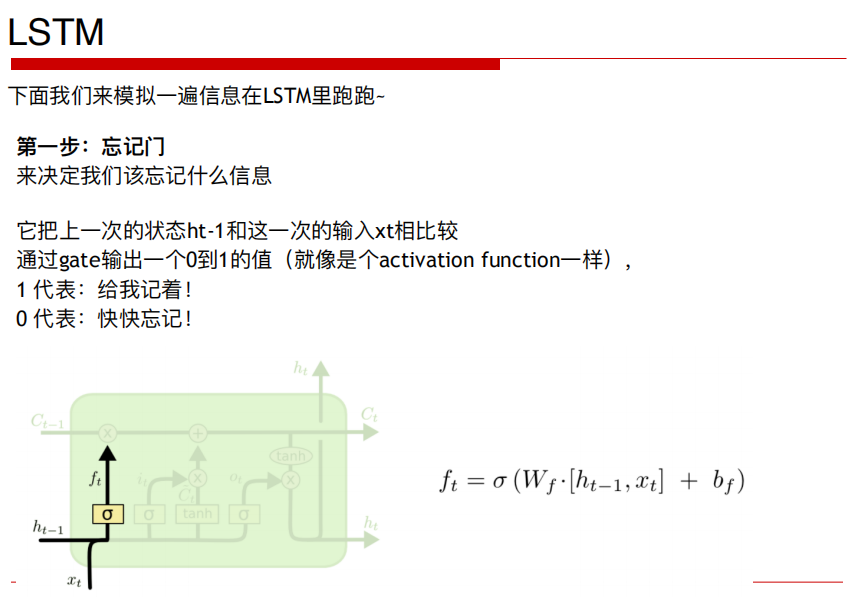

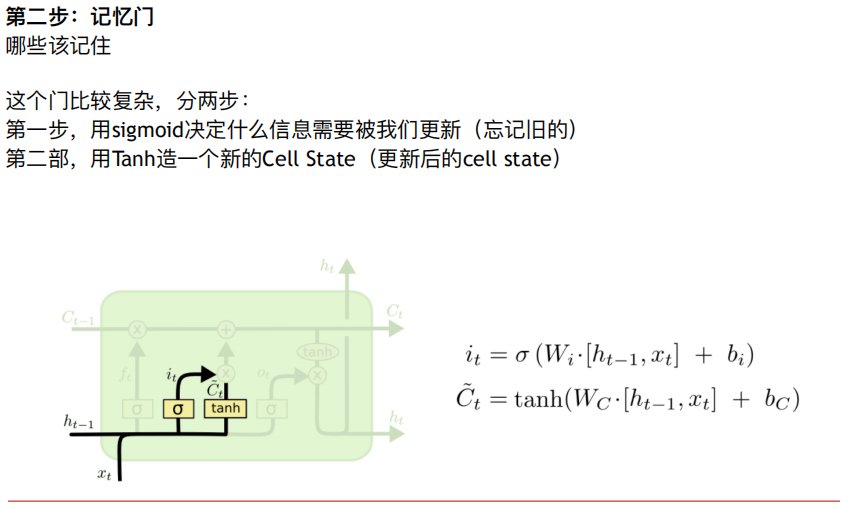

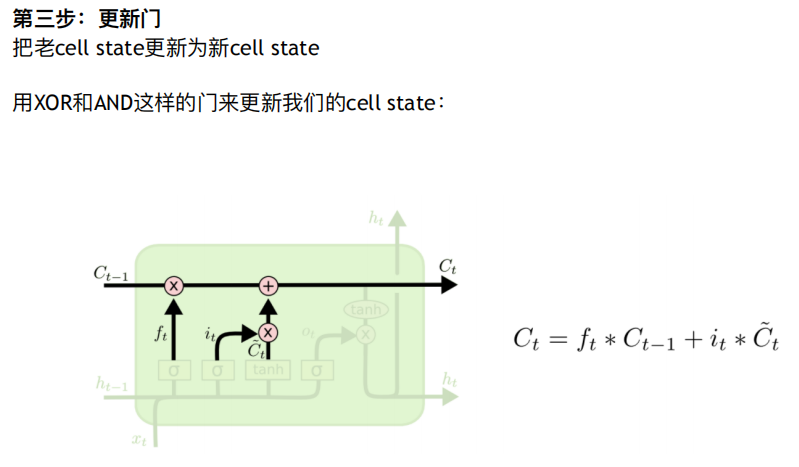

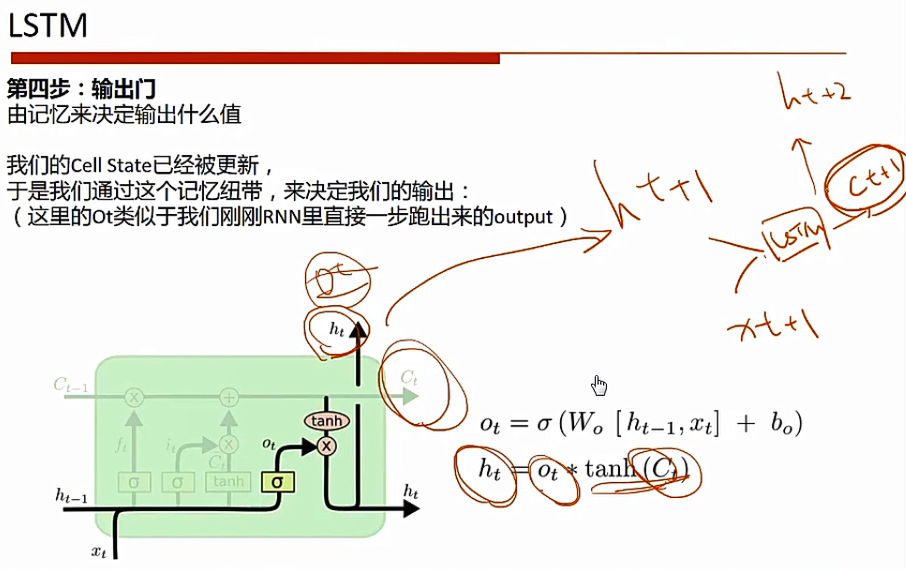

# RNN文本生成

In [1]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

Using TensorFlow backend.


In [14]:
raw_text = open('./input/Winston_Churchil.txt','r', encoding='UTF-8').read()
raw_text = raw_text.lower() 

In [15]:
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))
int_to_char = dict((i, c) for i, c in enumerate(chars))

In [22]:
# char_to_int

In [17]:
len(chars)

61

In [18]:
len(raw_text)

276830

我们这里简单的文本预测就是，给了前置的字母以后，下一个字母是谁？

比如，Winsto, 给出 n Britai 给出 n

In [19]:
# 构造训练测试集
seq_length = 100
x = []
y = []
for i in range(0, len(raw_text) - seq_length):
    given = raw_text[i:i + seq_length]
    predict = raw_text[i + seq_length]
    x.append([char_to_int[char] for char in given])
    y.append(char_to_int[predict])

In [23]:
# print(x[:3])
# print(y[:3])

接下来我们做两件事：

    我们已经有了一个input的数字表达（index），我们要把它变成LSTM需要的数组格式： [样本数，时间步伐，特征]

    第二，对于output，我们在Word2Vec里学过，用one-hot做output的预测可以给我们更好的效果，相对于直接预测一个准确的y数值的话。
